In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
runs = []
for i in range(6):
    runs.append(pd.read_csv("test_logs/2016-06-30_run%d.csv"%i))

In [3]:
run5 = runs[5]
run5.head()
run5.describe()
run5["an_volt"] = run5["Analog voltage"]
del run5["Analog voltage"]
run5["an_cur"] = run5["Analog current"]
del run5["Analog current"]
run5["ds_volt"] = run5["300V Bus Volt (DS)"]
del run5["300V Bus Volt (DS)"]
run5["ds_cur"] = run5["DeepSea reported Current"]
del run5["DeepSea reported Current"]

In [4]:
run5["time"] = run5["Sample Time"]
del run5["Sample Time"]

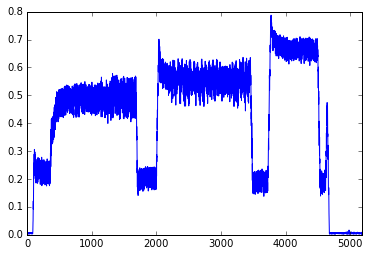

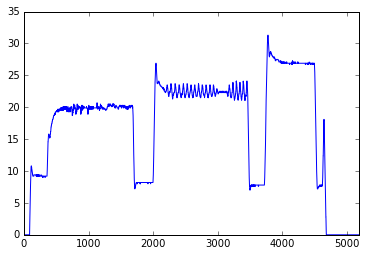

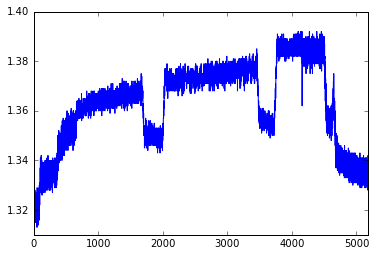

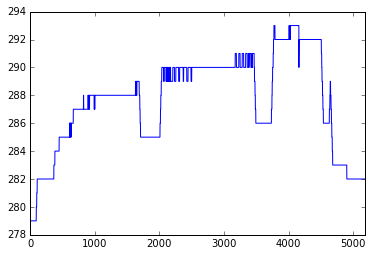

In [8]:
run5.an_cur.plot()
figure()
run5.ds_cur.plot()
figure()
run5.an_volt.plot()
figure()
run5.ds_volt.plot()

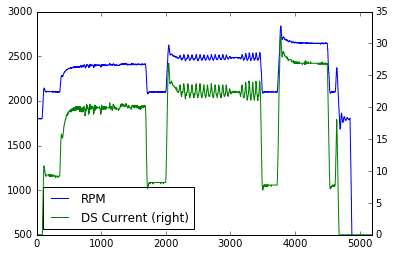

In [11]:
run5.RPM.plot(label="RPM", legend=True)
ylim([500, 3000])
run5.ds_cur.plot(label="DS Current", legend=True, secondary_y=True)

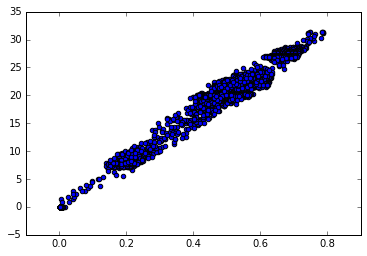

In [16]:
scatter(run5.an_cur, run5.ds_cur)
fit = np.polyfit(run5.an_cur, run5.ds_cur, deg=1)

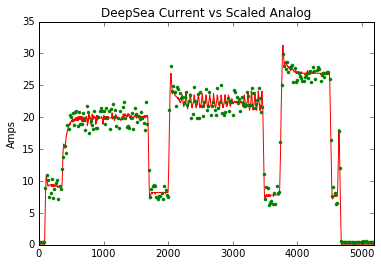

In [27]:
run5["an_scur"] = run5.an_cur * fit[0] + fit[1]
run5.ds_cur.plot(style='r')
run5.an_scur.plot(style='g.', markevery=20)
title("DeepSea Current vs Scaled Analog")
ylabel("Amps")

array([ 198.20694229,   17.46133247])

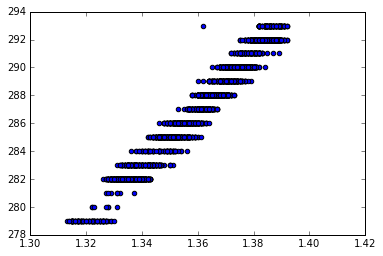

In [30]:
scatter(run5.an_volt, run5.ds_volt)
fit = np.polyfit(run5.an_volt, run5.ds_volt, deg=1)
np.poly

In [36]:
run5["an_svolt"] = run5.an_volt * fit[0] + fit[1]

In [34]:
# Polynomial Regression - from http://stackoverflow.com/a/895063
def polyfit(x, y, degree):
    results = {}

    coeffs = np.polyfit(x, y, degree)

     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()

    # r-squared
    p = np.poly1d(coeffs)
    # fit values, and mean
    yhat = p(x)                         # or [p(z) for z in x]
    ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    results['determination'] = ssreg / sstot

    return results

In [37]:
polyfit(run5.an_volt, run5.ds_volt, 1)

{'determination': 0.95834992959525933,
 'polynomial': [198.2069422947562, 17.4613324745097]}

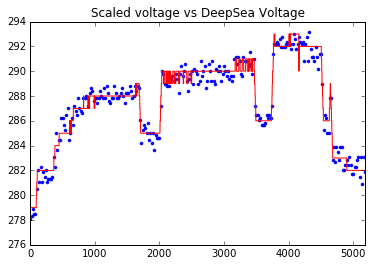

In [41]:
run5.an_svolt.plot(style='.', markevery=20)
run5.ds_volt.plot(style='r')
title("Scaled voltage vs DeepSea Voltage")